In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("trial.csv")

In [28]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [29]:
df.shape

(776, 18)

In [30]:
df.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [31]:
df.dropna(inplace = True)

In [32]:
df.shape

(775, 18)

In [33]:
df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [34]:
df.drop(['LOCATION_ID','TOTAL'],axis=1, inplace = True)
df.shape

(775, 16)

In [35]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [36]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(X)



In [37]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(pca_features)
pca_df.head()

,0,1
0,-0.322579,-0.122200
1,-1.423240,-0.027523
2,-1.424916,-0.027716
3,4.036051,-1.836297
4,-1.446245,-0.023689


In [38]:
pca_df.shape

(775, 2)

In [39]:
# target_names = {
#     0:0,
#     1:1
# }

# pca_df['Risk'] = Y
# pca_df['Risk'] = pca_df['Risk'].map(target_names)
# pca_df.head()

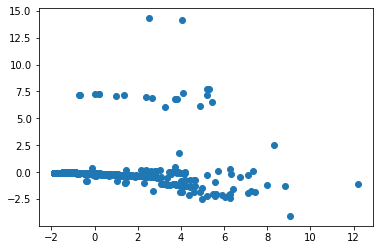

In [40]:
plt.scatter(pca_df[0],pca_df[1])

In [41]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors = 5)
model.fit(X)

NearestNeighbors()

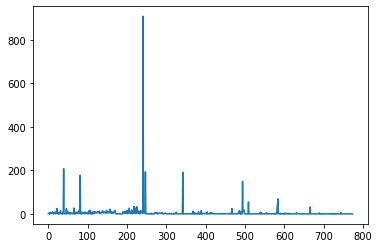

In [42]:
distances, indexes = model.kneighbors(X)

plt.plot(distances.mean(axis =1))

In [43]:
outlier_index = np.where(distances.mean(axis = 1) > 200)
outlier_index

(array([ 39, 241], dtype=int64),)

In [44]:
outlier_values = pca_df.iloc[outlier_index]
outlier_values

,0,1
39,4.992174,-1.453161
241,12.209582,-1.120841


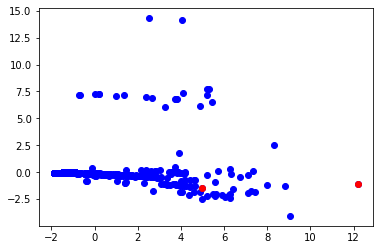

In [45]:
plt.scatter(pca_df[0], pca_df[1], color = "b")
plt.scatter(outlier_values[0], outlier_values[1], color = "r")

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_df, Y, test_size=0.2, random_state=0)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def to_print(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("Accuracy:", accuracy)
    print('Precision:', precision)
    print('Recall:', recall)

In [48]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[57  0]
 [ 0 98]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [49]:
clf = AdaBoostClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[57  0]
 [ 0 98]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [50]:
clf = AdaBoostClassifier(n_estimators = 150)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[57  0]
 [ 0 98]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [52]:
clf = AdaBoostClassifier(learning_rate = 1.0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[57  0]
 [ 0 98]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [53]:
clf = AdaBoostClassifier(learning_rate = 0.01)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[57  0]
 [ 1 97]]
Accuracy: 0.9935483870967742
Precision: 1.0
Recall: 0.9897959183673469


In [54]:
clf = AdaBoostClassifier(learning_rate = 0.001)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[57  0]
 [ 1 97]]
Accuracy: 0.9935483870967742
Precision: 1.0
Recall: 0.9897959183673469
